# Load MNIST Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# extract the mnist_train.csv 
#reading the data set
d0=pd.read_csv("mnist_train.csv")
# save class labes into a variable l
l=d0['label']
d=d0.drop('label',axis=1)
print(d.shape)
print(l.shape)
d.head(5)

(42000, 784)
(42000,)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


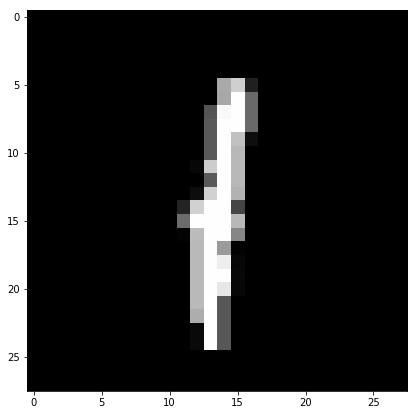

The above digit is 1


In [3]:
#display or plot a number
plt.figure(figsize =(7,7))
idx=12

#converting the data point with index as idx into a numpy array of size 28 * 28
grid_data = d.iloc[idx].values.reshape(28,28)

plt.imshow(grid_data, interpolation ='none',cmap='gray')
plt.show()
print('The above digit is ' + str(l[idx]))


# 2D visualization using PCA

In [ ]:
pca_data=d


In [ ]:
# data pre-processing : Standardizing the data i.e. mean=0 and varaince= 1
#Note: pca_data has been converteed to float type before apply standardization using the funtion 'astype()'
from sklearn.preprocessing import StandardScaler
std_data= StandardScaler().fit_transform(pca_data.astype(float))
print(std_data.shape)

In [ ]:
# finding the covariance matrix : S = (1/n)* A.T*A
cov_mat=(np.matmul(std_data.T, std_data))/std_data.shape[0]
print('The shape of covariance matrix is ',cov_mat.shape)

In [ ]:
#finding the top two eigen values and corrsponding eigen vectors
from scipy.linalg import eigh


# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors= eigh(cov_mat, eigvals=(782,783))

print('Shape of the vectors', vectors.shape)

#since vector[0] is 2nd principal and vectors[1] is 1st principal ,therefore we need to reverse the vectors and 
# take there traspose
vectors= vectors.T
vectors=vectors[::-1]
print('updated shape of the vectors', vectors.shape)

In [ ]:
#projecting the original data on the new plane formed by the two eigen vectors
new_coordinates= np.matmul(vectors,std_data.T)
print('(2,784) * (784,42000)  = (2,42000)' )
print(new_coordinates.shape)

In [ ]:
new_coordinates=np.vstack((new_coordinates,l)).T
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st principal", "2nd principal", "label"))
print(dataframe.head())

In [ ]:
#plotting the points in the nw coordinate system
import seaborn as sns
sns.FacetGrid(dataframe, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

# PCA using Scikit-learn

In [ ]:
# importing the PCA
from sklearn import decomposition
pca= decomposition.PCA()

In [ ]:
# the only parameter required to specify is the number of dimentions to which we want the data to be reduced to
pca.n_components = 2
p_data= pca.fit_transform(std_data)
print(p_data.shape)

In [ ]:
# attaching the labels to p_data
p_data=np.vstack((p_data.T,l)).T
print(p_data.shape)

In [ ]:
# creating a new dataFrame for plotting purpose
pca_df = pd.DataFrame(data=p_data, columns=("1st principal", "2nd principal", "label"))
print(dataframe.head())

In [ ]:
sns.FacetGrid(pca_df, hue='label',height=6).map(plt.scatter,'1st principal','2nd principal').add_legend()
plt.show()

# t-SNE using scikit-learn

In [ ]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, perplexity= 50, n_iter=4000)
#model with perplexity = 50
# and iterations =4000


tsne_data = model.fit_transform(std_data)


In [ ]:
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, l)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))



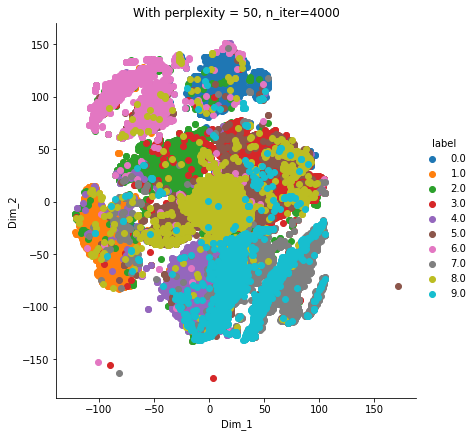

In [74]:
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=4000')
plt.show()